In [10]:
import numpy as np
import pandas as pd
import cv2

from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter('ignore')

In [11]:
df = pd.read_csv(r'C:\Users\hela1\Desktop\codealpha\Object Detection and Tracking\labels_train.csv.zip')
df = shuffle(df)
df.head()

,frame,xmin,xmax,ymin,ymax,class_id
100834,1479503232294162608.jpg,220,249,141,157,1
100770,1479503227296787359.jpg,209,223,144,157,1
79961,1479500588099343296.jpg,0,47,116,181,1
41558,1478897231149840796.jpg,172,185,49,75,5
71628,1479499709556094012.jpg,435,470,125,142,1


In [12]:
classes = df.class_id.unique()
print(classes)

[1 5 2 3 4]


In [13]:
labels = { 1:'car', 2:'truck', 3:'person', 4:'bicycle', 5:'traffic light'}

In [14]:
import os
import cv2

boxes = {}
images = {}

base_path = r'C:\Users\hela1\Desktop\codealpha\Object Detection and Tracking\images'

for class_id in classes:
    first_row = df[df['class_id'] == class_id].iloc[0]
    image_path = os.path.join(base_path, first_row['frame'])
    
    # Check if the image file exists
    if os.path.exists(image_path):
        images[class_id] = cv2.imread(image_path)
        boxes[class_id] = [first_row['xmin'], first_row['xmax'], first_row['ymin'], first_row['ymax']]
    else:
        print(f"File not found: {image_path}")


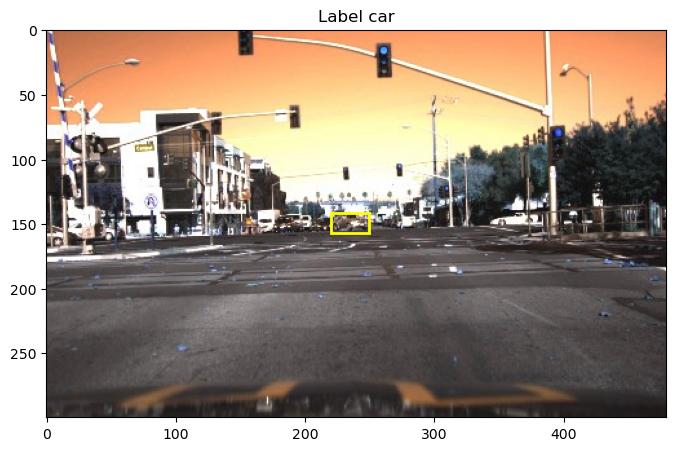

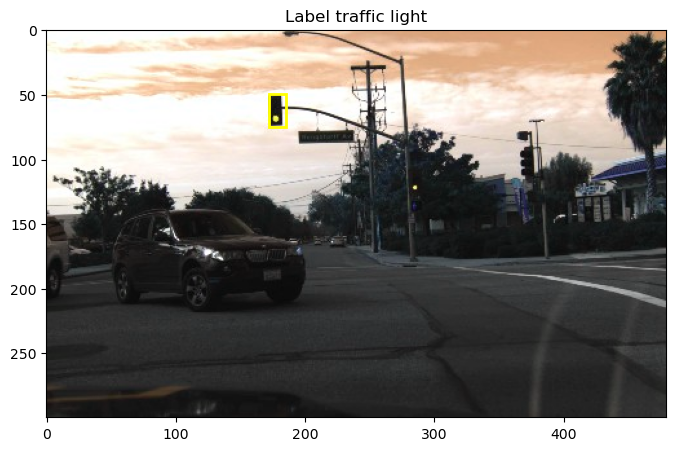

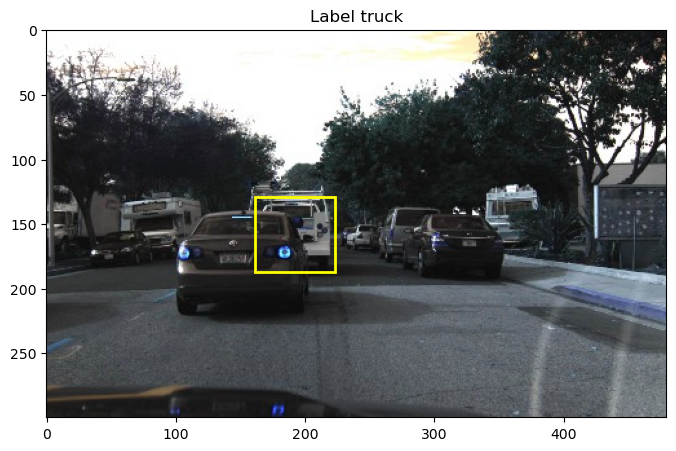

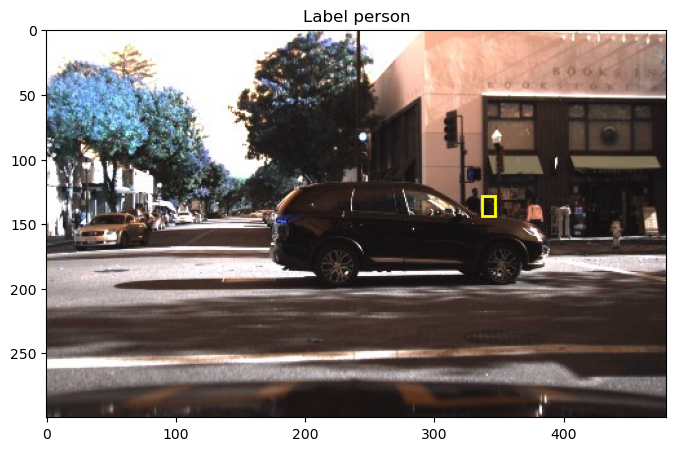

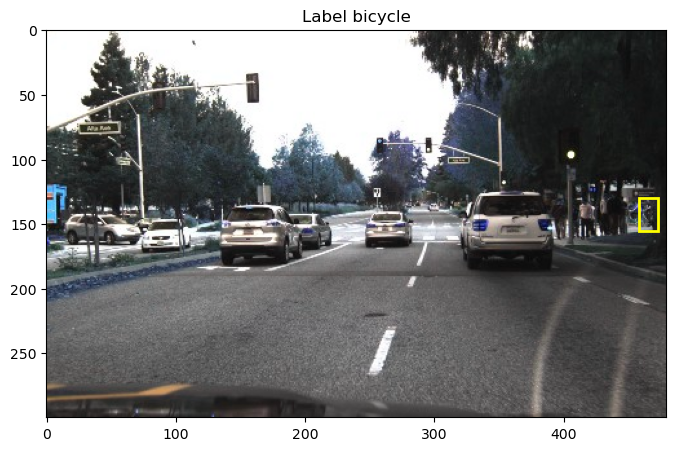

In [15]:
for i in classes:

    xmin, xmax, ymin, ymax = boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3]

    plt.figure(figsize=(8, 10))
    plt.title("Label " + labels[i])
    plt.imshow(images[i])
    plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='yellow', fill=False, linewidth=2))
    
    plt.show()

In [16]:
from ultralytics import YOLO
import PIL 
from PIL import Image
from IPython.display import display
import os 
import pathlib 

In [17]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")


100%|█████████████████████████████████████████████████████████████████████████████| 6.25M/6.25M [00:02<00:00, 2.24MB/s]


In [19]:
results=model.predict(source=r'C:\Users\hela1\Desktop\codealpha\Object Detection and Tracking\1478019956680248165.jpg',
              save=True, conf=0.2,iou=0.5)


image 1/1 C:\Users\hela1\Downloads\images\1478019956680248165.jpg: 416x640 1 car, 80.0ms
Speed: 10.0ms preprocess, 80.0ms inference, 309.8ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict


In [20]:
result = results[0]
box = result.boxes[0]

In [21]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

In [22]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 2.0
Coordinates: [124.05963134765625, 141.4466094970703, 151.26821899414062, 162.14723205566406]
Probability: 0.5924849510192871


In [23]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: car
Coordinates: [124, 141, 151, 162]
Probability: 0.59
---


In [25]:
results1 = model.predict(source=r"C:\Users\hela1\Desktop\codealpha\Object Detection and Tracking\1478020211690815798.jpg",
              save=True, conf=0.2,iou=0.5)

Results = results1[0]


image 1/1 C:\Users\hela1\Downloads\images\1478020211690815798.jpg: 416x640 3 cars, 2 traffic lights, 69.9ms
Speed: 650.0ms preprocess, 69.9ms inference, 13.2ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict


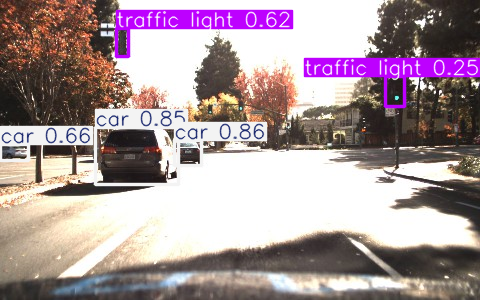

In [26]:
# Plotting results
plot = results1[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))